In [ ]:
# !conda install -c conda-forge osmnx 
# !conda install -c conda-forge shapely

In [2]:
import osmnx as ox
import time
from shapely.geometry import Polygon
import os

def save_graph_shapefile_directional(G, filepath=None, encoding="utf-8"):
    # default filepath if none was provided
    if filepath is None:
        filepath = os.path.join(ox.settings.data_folder, "graph_shapefile")

    # if save folder does not already exist, create it (shapefiles
    # get saved as set of files)
    if not filepath == "" and not os.path.exists(filepath):
        os.makedirs(filepath)
    filepath_nodes = os.path.join(filepath, "nodes.shp")
    filepath_edges = os.path.join(filepath, "edges.shp")

    # convert undirected graph to gdfs and stringify non-numeric columns
    gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G)
    gdf_nodes = ox.io._stringify_nonnumeric_cols(gdf_nodes)
    gdf_edges = ox.io._stringify_nonnumeric_cols(gdf_edges)
    # We need an unique ID for each edge
    gdf_edges["fid"] = gdf_edges.index
    # save the nodes and edges as separate ESRI shapefiles
    gdf_nodes.to_file(filepath_nodes, encoding=encoding)
    gdf_edges.to_file(filepath_edges, encoding=encoding)

print("osmnx version",ox.__version__)

osmnx version 0.16.2


### Download network in a boundingbox

In [3]:
bounds = (18.029122582902115, 18.070836297501724, 59.33476653724975, 59.352622230576124)
x1,x2,y1,y2 = bounds
boundary_polygon = Polygon([(x1,y1),(x2,y1),(x2,y2),(x1,y2)])
G = ox.graph_from_polygon(boundary_polygon, network_type='drive')
start_time = time.time()
save_graph_shapefile_directional(G, filepath='../../data/stockholm')
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.4474039077758789 seconds ---


### Download network in a city

In [4]:
place ="Porto"
G = ox.graph_from_place(place, network_type='drive', which_result=2)
save_graph_shapefile_directional(G, filepath='../../data/porto')

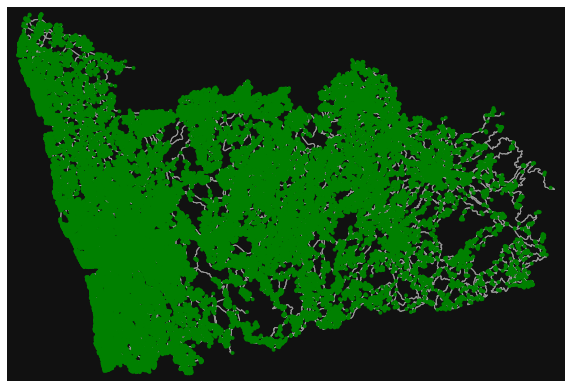

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [5]:
ox.plot_graph(G, figsize=(10, 10), bgcolor='#111111', node_color='g')

### Download network with a boundary

+ https://peteris.rocks/blog/openstreetmap-administrative-boundaries-in-geojson/
+ http://polygons.openstreetmap.fr/?id=3372453

In [6]:
# Download by a boundary polygon in geojson
import osmnx as ox
from shapely.geometry import shape
json_file = open("porto_city_boundary.geojson")
import json
data = json.load(json_file)
# boundary_polygon = shape(data["features"][0]['geometry'])
boundary_polygon = shape(data["geometries"][0])
G = ox.graph_from_polygon(boundary_polygon, network_type='drive') #drive
#save_graph_shapefile_directional(G, filepath='../../data/porto_city')

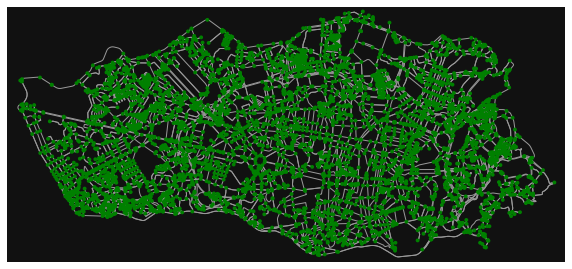

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:>)

In [7]:
ox.plot_graph(G, figsize=(10, 10), bgcolor='#111111', node_color='g')

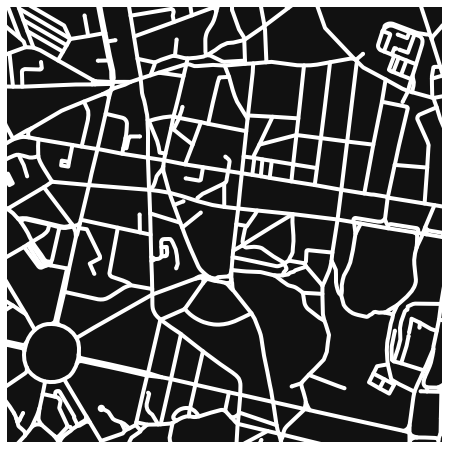

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [8]:
ox.plot.plot_figure_ground(G)

In [9]:
# ox.io.save_graphml(G, filepath='porto_city')